<a href="https://colab.research.google.com/github/praseedm/PGMP/blob/main/Interpolation_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://www.youtube.com/watch?v=eI1wjDGlics
# https://github.com/jvdkwast/PCRasterTutorials/tree/main/GroundwaterInterpolation/Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
location_ids = pd.read_csv("/content/loaction_ids.csv")

In [ ]:
location_ids.head(3)

,id,name,x,y
0,1,Loc 1,0.112276,52.232554
1,2,Loc 2,0.112071,52.232607
2,3,Loc 3,0.111989,52.232485


In [ ]:
no2_data = pd.read_csv("/content/no2_20_3_27_3.csv")

In [ ]:
no2_data.head(3)

,Date Time,Monitor ID,Location ID,NO2(ppm)
0,3/22/2023 19:24,2,22,0.002
1,3/22/2023 19:25,2,22,0.000
2,3/22/2023 19:26,2,22,0.000


In [ ]:
pm_data = pd.read_csv("/content/pm_20_3_27_3.csv")

In [ ]:
pm_data.head(3)

,Date Time,Monitor ID,Location ID,PM10(ppm),PM2.5(ppm)
0,22 Mar 2023 19:06,1,3,0.023,0.011
1,22 Mar 2023 19:07,1,22,0.020,0.010
2,22 Mar 2023 19:09,1,22,0.020,0.011


In [ ]:
pm_data[' Location ID'].unique()

array([ 3, 22, 23,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18])

In [ ]:
pm_data.shape

(360, 5)

In [ ]:
[i for i in range(1,19)]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [ ]:
pm_data = pm_data[pm_data[' Location ID'].isin([i for i in range(1,19)])]

In [ ]:
no2_data = no2_data[no2_data[' Location ID'].isin([i for i in range(1,19)])]

In [ ]:
no2_data.head(3)

,Date Time,Monitor ID,Location ID,NO2(ppm)
3,3/23/2023 12:04,2,1,0.0
4,3/23/2023 12:05,2,1,0.0
5,3/23/2023 12:06,2,1,0.0


In [ ]:
no2_data['id'] = no2_data[' Location ID']

In [ ]:
pm_data['id'] = pm_data[' Location ID']

In [ ]:
pm_data.head(3)

,Date Time,Monitor ID,Location ID,PM10(ppm),PM2.5(ppm),id
0,22 Mar 2023 19:06,1,3,0.023,0.011,3
7,23 Mar 2023 12:04,1,1,0.032,0.007,1
8,23 Mar 2023 12:05,1,1,0.031,0.007,1


In [ ]:
location_ids.head(3)

,id,name,x,y
0,1,Loc 1,0.112276,52.232554
1,2,Loc 2,0.112071,52.232607
2,3,Loc 3,0.111989,52.232485


In [ ]:
df3 = pm_data.merge(location_ids, on='id', how='inner')

In [ ]:
no2_data = no2_data.merge(location_ids, on='id', how='inner')

In [ ]:
no2_data.head(3)

,Date Time,Monitor ID,Location ID,NO2(ppm),id,name,x,y
0,3/23/2023 12:04,2,1,0.0,1,Loc 1,0.112276,52.232554
1,3/23/2023 12:05,2,1,0.0,1,Loc 1,0.112276,52.232554
2,3/23/2023 12:06,2,1,0.0,1,Loc 1,0.112276,52.232554


In [ ]:
df3.head(3)

,Date Time,Monitor ID,Location ID,PM10(ppm),PM2.5(ppm),id,name,x,y
0,22 Mar 2023 19:06,1,3,0.023,0.011,3,Loc 3,0.111989,52.232485
1,23 Mar 2023 12:46,1,3,0.102,0.036,3,Loc 3,0.111989,52.232485
2,23 Mar 2023 12:47,1,3,0.078,0.012,3,Loc 3,0.111989,52.232485


In [ ]:
df3.columns

Index(['Date Time', ' Monitor ID', ' Location ID', ' PM10(ppm)', ' PM2.5(ppm)',
       'id', 'name', 'x', 'y'],
      dtype='object')

In [ ]:
no2_data.columns

Index(['Date Time', ' Monitor ID', ' Location ID', ' NO2(ppm)', 'id', 'name',
       'x', 'y'],
      dtype='object')

In [ ]:
df3.to_csv("pm_data.csv")

In [ ]:
no2_data.to_csv("no2_data.csv")

In [2]:
df3 = pd.read_csv("/content/pm_data.csv")
no2_data = pd.read_csv("/content/no2_data.csv")

In [3]:
pm2_5_col_name = ' PM2.5(ppm)'
pm10_col_name = ' PM10(ppm)'
no2_col_name = ' NO2(ppm)'

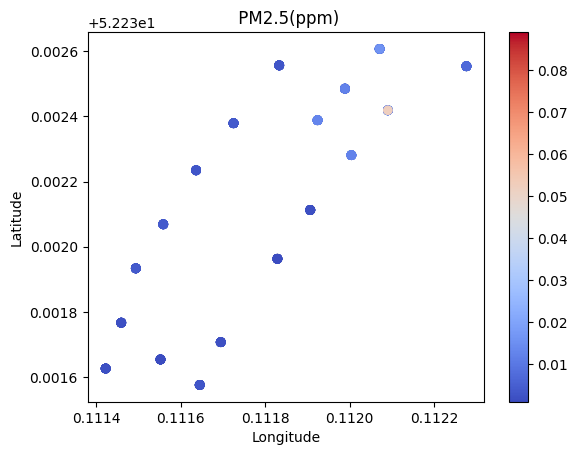

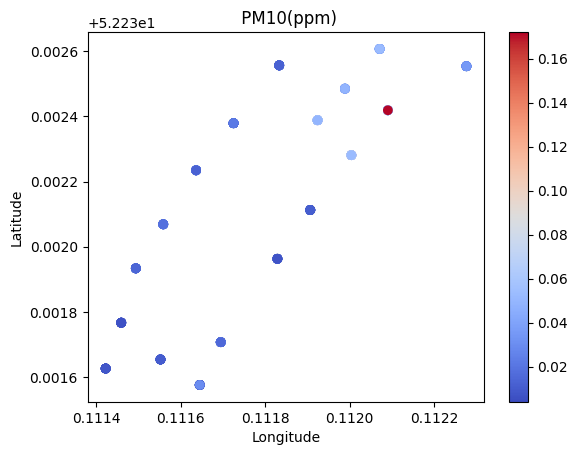

In [ ]:



# Create scatter plot for PM2.5 values
plt.scatter(df3['x'], df3['y'], c=df3[' PM2.5(ppm)'], cmap='coolwarm')
plt.colorbar()
plt.title(' PM2.5(ppm)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

plt.scatter(df3['x'], df3['y'], c=df3[' PM10(ppm)'], cmap='coolwarm')
plt.colorbar()
plt.title(' PM10(ppm)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

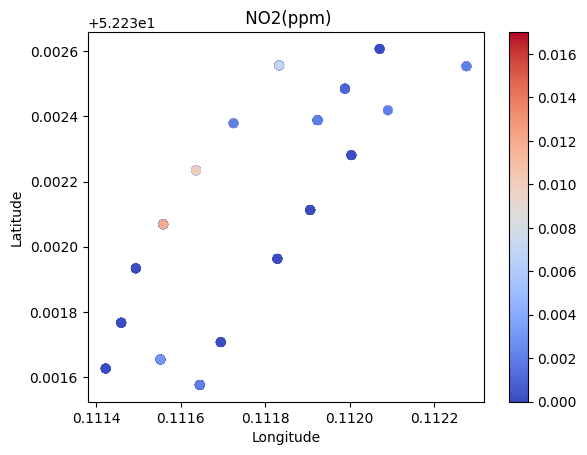

In [ ]:
plt.scatter(no2_data['x'], no2_data['y'], c=no2_data[no2_col_name], cmap='coolwarm')
plt.colorbar()
plt.title(' NO2(ppm)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

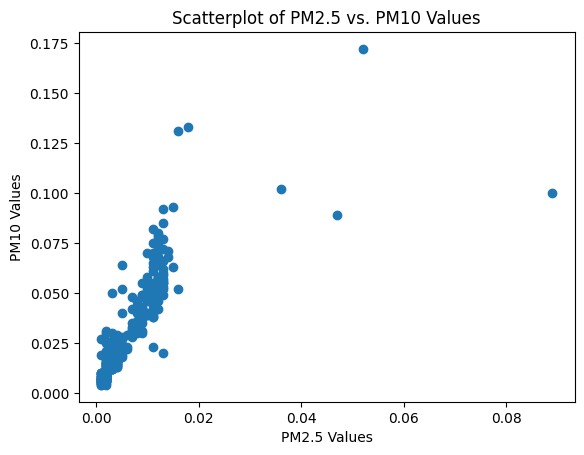

In [ ]:
# Create a scatterplot for PM2.5 vs. PM10 values
plt.scatter(df3[pm2_5_col_name], df3[pm10_col_name])
plt.title('Scatterplot of PM2.5 vs. PM10 Values')
plt.xlabel('PM2.5 Values')
plt.ylabel('PM10 Values')
plt.show()

A scatterplot of PM2.5 vs. PM10 values shows the relationship between the two pollutants. PM2.5 and PM10 are both particulate matter, but they differ in their size. PM2.5 are fine particles with a diameter of less than 2.5 micrometers, while PM10 are larger particles with a diameter of less than 10 micrometers.

The scatterplot can show if there is a correlation between the levels of PM2.5 and PM10 in the air. If there is a strong positive correlation, it means that as the levels of PM2.5 increase, the levels of PM10 also increase. Similarly, if there is a strong negative correlation, it means that as the levels of PM2.5 increase, the levels of PM10 decrease.

By analyzing the scatterplot, we can gain insights into the sources of pollution and the effectiveness of control measures. For example, if there is a strong positive correlation between PM2.5 and PM10, it could suggest that the sources of these pollutants are similar, such as traffic or construction activities. Conversely, if there is no correlation or a weak correlation, it could suggest that the sources of PM2.5 and PM10 are different and need to be addressed separately.

In [5]:
import seaborn as sns

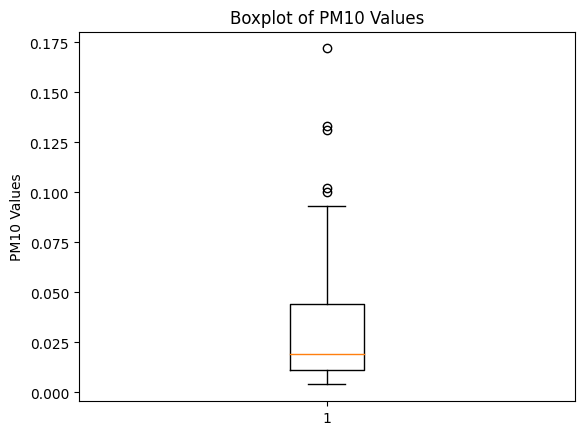

In [ ]:
# Create a boxplot for PM10 values
plt.boxplot(df3[pm10_col_name])
plt.title('Boxplot of PM10 Values')
plt.ylabel('PM10 Values')
plt.show()

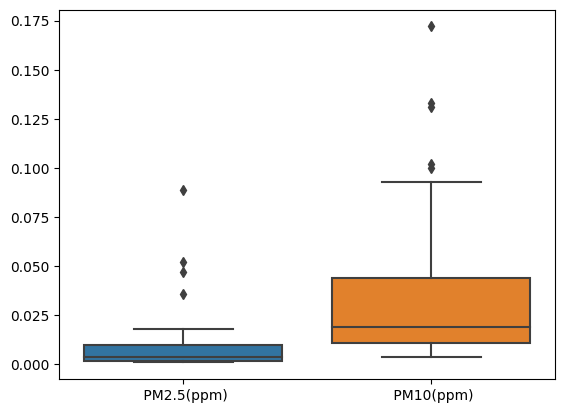

In [ ]:
ax = sns.boxplot(data=df3[[pm2_5_col_name, pm10_col_name]])

<Axes: >

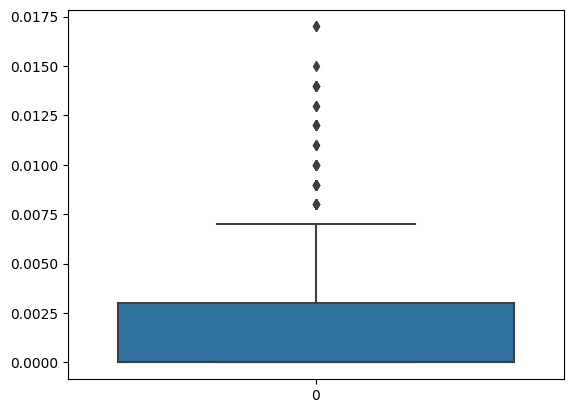

In [7]:
sns.boxplot(data=no2_data[no2_col_name])

<ipython-input-16-103d5d528400>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3[pm10_col_name], bins=20, color='blue', label='PM Values')


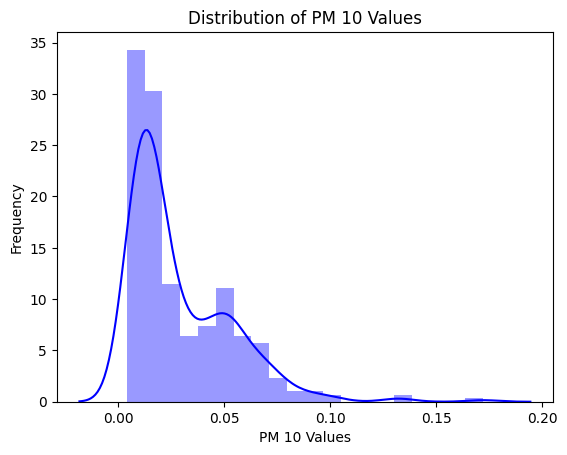

In [16]:

fig, ax = plt.subplots()

sns.distplot(df3[pm10_col_name], bins=20, color='blue', label='PM Values')

ax.set_title('Distribution of PM 10 Values')
ax.set_xlabel('PM 10 Values')
ax.set_ylabel('Frequency')

plt.show()

<ipython-input-18-93dd104166c9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3[pm2_5_col_name], bins=20, color='blue', label='PM Values')


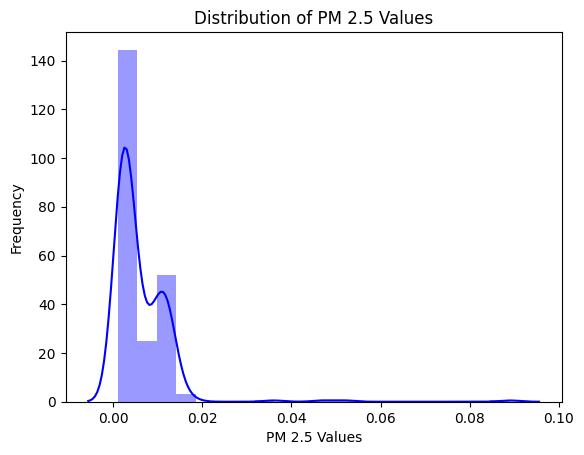

In [18]:
fig, ax = plt.subplots()

sns.distplot(df3[pm2_5_col_name], bins=20, color='blue', label='PM Values')

ax.set_title('Distribution of PM 2.5 Values')
ax.set_xlabel('PM 2.5 Values')
ax.set_ylabel('Frequency')

plt.show()

In [ ]:
df3[[pm2_5_col_name, pm10_col_name]].describe()

,PM2.5(ppm),PM10(ppm)
count,354.000000,354.000000
mean,0.006102,0.028825
std,0.007092,0.024076
min,0.001000,0.004000
25%,0.002000,0.011000
50%,0.004000,0.019000
75%,0.010000,0.044000
max,0.089000,0.172000


<ipython-input-10-1963df27c78d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(no2_data[no2_col_name], bins=20, color='blue', label='NO2 Values')


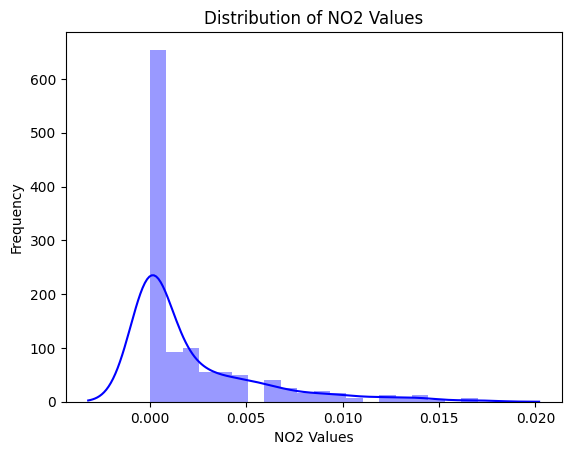

In [10]:
fig, ax = plt.subplots()

sns.distplot(no2_data[no2_col_name], bins=20, color='blue', label='NO2 Values')

ax.set_title('Distribution of NO2 Values')
ax.set_xlabel('NO2 Values')
ax.set_ylabel('Frequency')

plt.show()

In [11]:
no2_data[no2_col_name].describe()

count    356.000000
mean       0.002121
std        0.003448
min        0.000000
25%        0.000000
50%        0.000000
75%        0.003000
max        0.017000
Name:  NO2(ppm), dtype: float64

In [14]:
import numpy as np

# Calculate Z-scores for NO2 data
no2_zscores = np.abs((no2_data[no2_col_name] - no2_data[no2_col_name].mean()) / no2_data[no2_col_name].std())

# Remove data points with Z-scores greater than 3 (outliers)
no2_data_new = no2_data[no2_zscores <= 3]

# Print summary statistics of NO2 data after removing outliers
print(no2_data_new[no2_col_name].describe())

count    347.000000
mean       0.001798
std        0.002831
min        0.000000
25%        0.000000
50%        0.000000
75%        0.003000
max        0.012000
Name:  NO2(ppm), dtype: float64


<ipython-input-15-757e2094d678>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(no2_data_new[no2_col_name], bins=20, color='blue', label='NO2 Values')


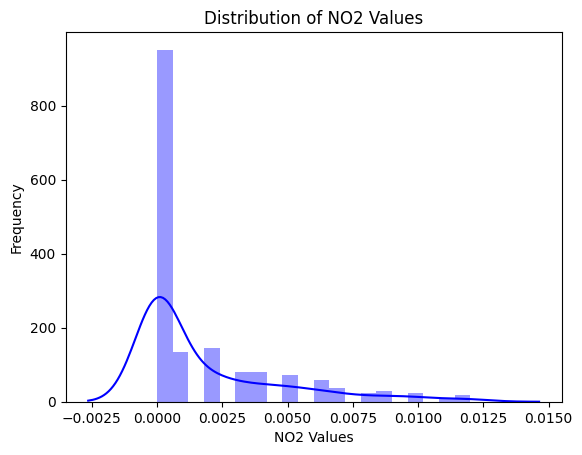

In [15]:
fig, ax = plt.subplots()

sns.distplot(no2_data_new[no2_col_name], bins=20, color='blue', label='NO2 Values')

ax.set_title('Distribution of NO2 Values')
ax.set_xlabel('NO2 Values')
ax.set_ylabel('Frequency')

plt.show()

## Interpolation

In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

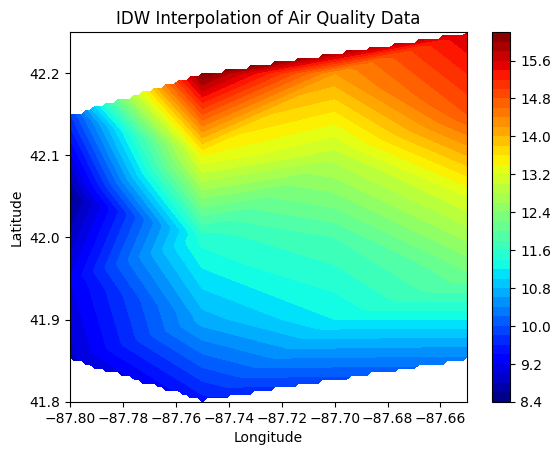

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# load data from the CSV file
data = pd.read_csv('temp_pm_data.csv')

# define the limits and spacing of the grid
x = np.linspace(data['Longitude'].min(), data['Longitude'].max(), 100)
y = np.linspace(data['Latitude'].min(), data['Latitude'].max(), 100)

# create the grid
X, Y = np.meshgrid(x, y)

# perform IDW interpolation
Z = griddata((data['Longitude'], data['Latitude']), data['PM2.5 Concentration'], (X, Y), method='linear')

# create a filled contour plot
plt.contourf(X, Y, Z, levels=50, cmap='jet')
plt.colorbar()

# add title and labels
plt.title('IDW Interpolation of Air Quality Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# show the plot
plt.show()


## Ordinary Krigging

In [ ]:
!!pip install pykrige

['Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/',
 'Collecting pykrige',
 '  Downloading PyKrige-1.7.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (860 kB)',
 '\x1b[?25l     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/860.5 KB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b860.5/860.5 KB\x1b \x1b36.8 MB/s\x1b eta \x1b0:00:00\x1b',
 '\x1b[?25hRequirement already satisfied: numpy<2,>=1.14.5 in /usr/local/lib/python3.9/dist-packages (from pykrige) (1.22.4)',
 'Requirement already satisfied: scipy<2,>=1.1.0 in /usr/local/lib/python3.9/dist-packages (from pykrige) (1.10.1)',
 'Installing collected packages: pykrige',
 'Successfully installed pykrige-1.7.0']

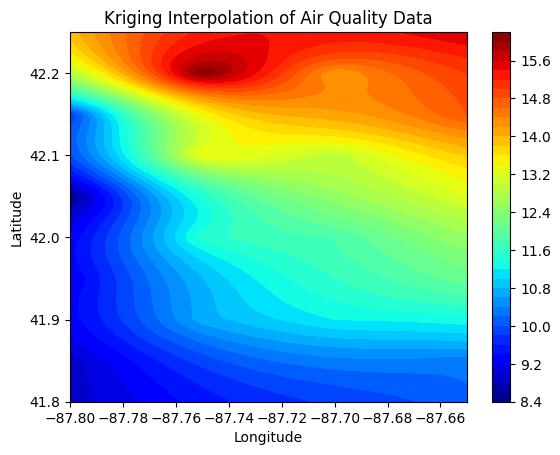

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pykrige.ok import OrdinaryKriging

# load data from the CSV file
data = pd.read_csv('temp_pm_data.csv')

# define the limits and spacing of the grid
x = np.linspace(data['Longitude'].min(), data['Longitude'].max(), 100)
y = np.linspace(data['Latitude'].min(), data['Latitude'].max(), 100)

# create the grid
X, Y = np.meshgrid(x, y)

# perform kriging interpolation
OK = OrdinaryKriging(data['Longitude'], data['Latitude'], data['PM2.5 Concentration'], variogram_model='linear', verbose=False, enable_plotting=False)
Z, _ = OK.execute('grid', x, y)

# create a filled contour plot
plt.contourf(X, Y, Z, levels=50, cmap='jet')
plt.colorbar()

# add title and labels
plt.title('Kriging Interpolation of Air Quality Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# show the plot
plt.show()


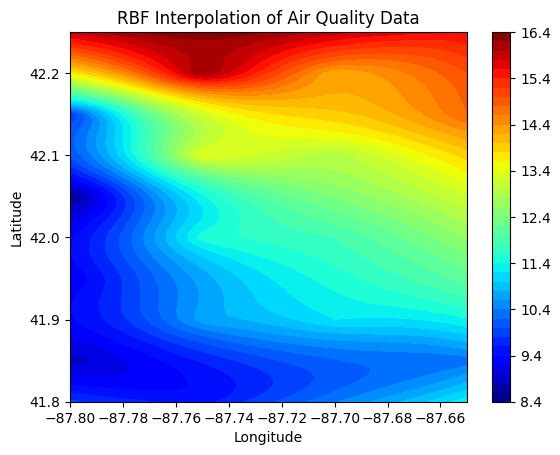

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf

# load data from the CSV file
data = pd.read_csv('temp_pm_data.csv')

# define the limits and spacing of the grid
x = np.linspace(data['Longitude'].min(), data['Longitude'].max(), 100)
y = np.linspace(data['Latitude'].min(), data['Latitude'].max(), 100)

# create the grid
X, Y = np.meshgrid(x, y)

# perform RBF interpolation
rbf = Rbf(data['Longitude'], data['Latitude'], data['PM2.5 Concentration'], function='linear')
Z = rbf(X, Y)

# create a filled contour plot
plt.contourf(X, Y, Z, levels=50, cmap='jet')
plt.colorbar()

# add title and labels
plt.title('RBF Interpolation of Air Quality Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# show the plot
plt.show()


## RMSE

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.interpolate import Rbf
from pykrige.ok import OrdinaryKriging

# load data from the CSV file
data = pd.read_csv('temp_pm_data.csv')

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['Longitude', 'Latitude']], data['PM2.5 Concentration'], test_size=0.3, random_state=42)

# define the limits and spacing of the grid
x = np.linspace(data['Longitude'].min(), data['Longitude'].max(), 100)
y = np.linspace(data['Latitude'].min(), data['Latitude'].max(), 100)

# create the grid
X, Y = np.meshgrid(x, y)

# perform IDW interpolation on the testing set
Z_idw = []
for i in range(len(X_test)):
    dist = np.sqrt((X_train['Longitude']-X_test.iloc[i,0])**2 + (X_train['Latitude']-X_test.iloc[i,1])**2)
    w = 1 / (dist**2)
    Z_idw.append(np.sum(w*y_train)/np.sum(w))
Z_idw = np.array(Z_idw)

# perform kriging interpolation on the testing set
OK = OrdinaryKriging(X_train['Longitude'], X_train['Latitude'], y_train, variogram_model='linear', verbose=False, enable_plotting=False)
Z_kriging, _ = OK.execute('points', X_test['Longitude'], X_test['Latitude'])

# perform RBF interpolation on the testing set
rbf = Rbf(X_train['Longitude'], X_train['Latitude'], y_train, function='linear')
Z_rbf = rbf(X_test['Longitude'], X_test['Latitude'])

# compute RMSE for each interpolation technique
RMSE_idw = np.sqrt(np.mean((y_test-Z_idw)**2))
RMSE_kriging = np.sqrt(np.mean((y_test-Z_kriging)**2))
RMSE_rbf = np.sqrt(np.mean((y_test-Z_rbf)**2))

print('RMSE for IDW interpolation:', RMSE_idw)
print('RMSE for kriging interpolation:', RMSE_kriging)
print('RMSE for RBF interpolation:', RMSE_rbf)


RMSE for IDW interpolation: 1.4131065615334506
RMSE for kriging interpolation: 1.0980018267884657
RMSE for RBF interpolation: 3.8407717740040734


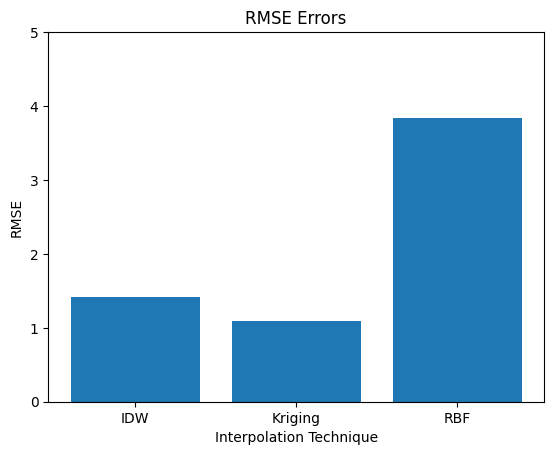

In [ ]:
import numpy as np

# calculate RMSE errors for each interpolation technique
rmse_idw = np.sqrt(np.mean((y_test - Z_idw)**2))
rmse_kriging = np.sqrt(np.mean((y_test - Z_kriging)**2))
rmse_rbf = np.sqrt(np.mean((y_test - Z_rbf)**2))

# create bar chart of RMSE errors
plt.bar(['IDW', 'Kriging', 'RBF'], [rmse_idw, rmse_kriging, rmse_rbf])
plt.title('RMSE Errors')
plt.xlabel('Interpolation Technique')
plt.ylabel('RMSE')
plt.ylim(0, 5)
plt.show()


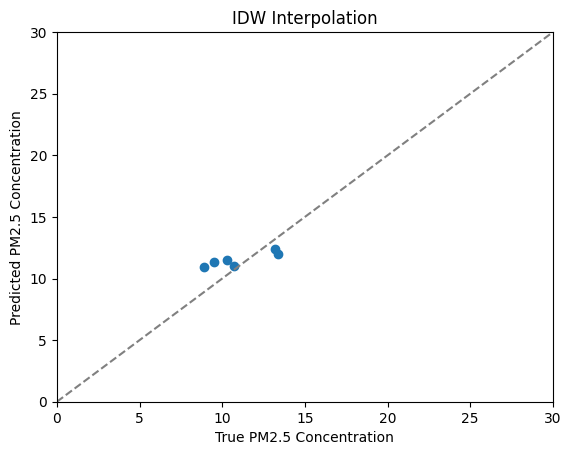

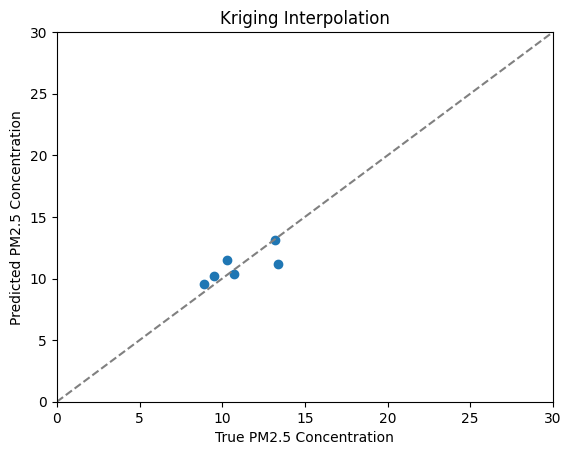

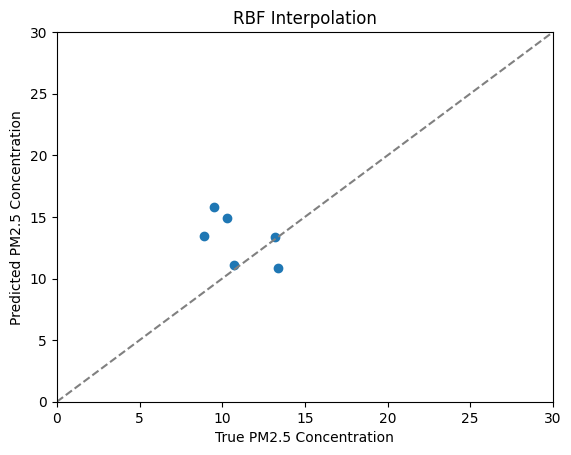

In [ ]:
# create scatter plot of true PM2.5 concentrations vs. IDW predicted values
plt.scatter(y_test, Z_idw)
plt.plot([0, 30], [0, 30], linestyle='--', color='gray')
plt.title('IDW Interpolation')
plt.xlabel('True PM2.5 Concentration')
plt.ylabel('Predicted PM2.5 Concentration')
plt.xlim(0, 30)
plt.ylim(0, 30)
plt.show()

# create scatter plot of true PM2.5 concentrations vs. kriging predicted values
plt.scatter(y_test, Z_kriging)
plt.plot([0, 30], [0, 30], linestyle='--', color='gray')
plt.title('Kriging Interpolation')
plt.xlabel('True PM2.5 Concentration')
plt.ylabel('Predicted PM2.5 Concentration')
plt.xlim(0, 30)
plt.ylim(0, 30)
plt.show()

# create scatter plot of true PM2.5 concentrations vs. RBF predicted values
plt.scatter(y_test, Z_rbf)
plt.plot([0, 30], [0, 30], linestyle='--', color='gray')
plt.title('RBF Interpolation')
plt.xlabel('True PM2.5 Concentration')
plt.ylabel('Predicted PM2.5 Concentration')
plt.xlim(0, 30)
plt.ylim(0, 30)
plt.show()


In [ ]:
import seaborn as sns

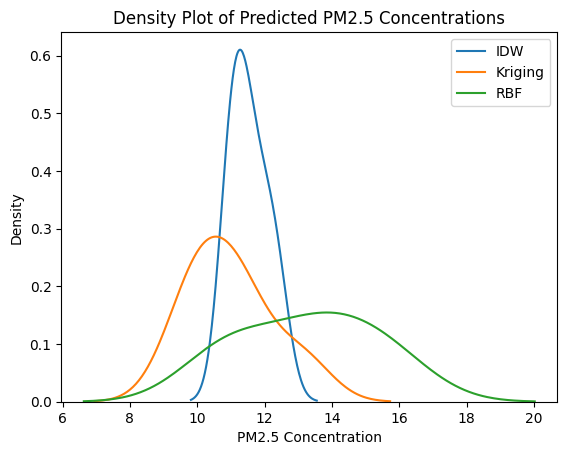

In [ ]:
sns.kdeplot(Z_idw, label='IDW')
sns.kdeplot(Z_kriging, label='Kriging')
sns.kdeplot(Z_rbf, label='RBF')
plt.xlabel('PM2.5 Concentration')
plt.ylabel('Density')
plt.title('Density Plot of Predicted PM2.5 Concentrations')
plt.legend()


**Density plot: A density plot can be used to show the distribution of predicted values for each interpolation technique. This can help to visualize any differences in the shape or spread of the distributions.**

Text(0.5, 1.0, 'Box Plot of Predicted PM2.5 Concentrations')

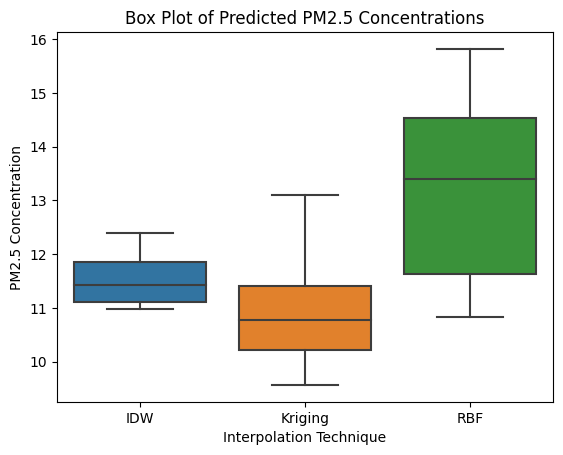

In [ ]:
sns.boxplot(data=[Z_idw, Z_kriging, Z_rbf])
plt.xticks(ticks=[0, 1, 2], labels=['IDW', 'Kriging', 'RBF'])
plt.xlabel('Interpolation Technique')
plt.ylabel('PM2.5 Concentration')
plt.title('Box Plot of Predicted PM2.5 Concentrations')

**Box plot: A box plot can be used to compare the median and spread of the predicted values for each interpolation technique. This can help to identify any outliers or differences in the central tendency of the distributions.**